In [1]:
from extract import SocialETL, construct_query_for_twarc, extract_tags, SocialDB, UserETL
import hashtags as h
import hashtags_readcsv as r_csv
import pandas as pd
import numpy as np
import json
import statistics
import networkx as nx
from numpy import nan

# 1) Download DF

## df_proukr

In [2]:
m1 = SocialETL(query="(#slavaukraini)", pages=3, recent=False) 

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

In [3]:
m1.df=m1.df.dropna(subset=['entities.hashtags'])
m1.df=m1.df.dropna(subset=['retweeted_user_id'])

In [4]:
m1.df['entities.hashtags']=m1.df['entities.hashtags'].apply(eval)
m1.df['entities.hashtags']=m1.df['entities.hashtags'].map(h.extract_tags)

In [5]:
df_proukr=pd.DataFrame({"user_id":m1.df['author_id'],
                       'tweet_id':m1.df['id'],
                      'retweet_id': m1.df['retweeted_user_id'],
                      "hashtag":m1.df['entities.hashtags'],
                     'location':m1.df['author.location'],
                     'verified':m1.df['author.verified']
                      })

In [6]:
#df_proukr.set_index('user_id',inplace=True)
df_proukr.shape

(164, 6)

## df_pax

In [7]:
m2 = SocialETL(query="(#stopwarinukraine )", pages=7, recent=False) 

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

In [8]:
m2.df=m2.df.dropna(subset=['entities.hashtags'])
m2.df=m2.df.dropna(subset=['retweeted_user_id'])

In [9]:
m2.df['entities.hashtags']=m2.df['entities.hashtags'].apply(eval)
m2.df['entities.hashtags']=m2.df['entities.hashtags'].map(h.extract_tags)

In [10]:
df_pax=pd.DataFrame({"user_id":m2.df['author_id'],
                       'tweet_id':m2.df['id'],
                      'retweet_id': m2.df['retweeted_user_id'],
                      "hashtag":m2.df['entities.hashtags'],
                     'location':m2.df['author.location'],
                     'verified':m2.df['author.verified']
                      })
df_pax.shape

(329, 6)

In [11]:
#df_pax.set_index('user_id',inplace=True)
df_pax.shape

(329, 6)

## df_prorus

In [12]:
m3 = SocialETL(query="(#istandwithputin)", pages=7, recent=False) 
m3.df.shape

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

(654, 78)

In [13]:
m3.df=m3.df.dropna(subset=['entities.hashtags'])
m3.df=m3.df.dropna(subset=['retweeted_user_id'])

In [14]:
m3.df['entities.hashtags']=m3.df['entities.hashtags'].apply(eval)
m3.df['entities.hashtags']=m3.df['entities.hashtags'].map(h.extract_tags)
#m.df['retweeted_user_id']=m.df['retweeted_user_id'].tolist()
#m.df['conversation_id']=m.df['conversation_id'].tolist()
#m.df['author.location']=m.df['author.location'].tolist()
#m.df['author.verified']=m.df['author.verified'].tolist()
#m.df['id']=m.df['id'].tolist()

In [15]:
#create a pandas dataframe
df_prorus=pd.DataFrame({"user_id":m3.df['author_id'],
                       'tweet_id':m3.df['id'],
                      'retweet_id': m3.df['retweeted_user_id'],
                      "hashtag":m3.df['entities.hashtags'],
                     'location':m3.df['author.location'],
                     'verified':m3.df['author.verified']
                      })


In [16]:
#df_prorus.set_index('user_id',inplace=True)
df_prorus.shape

(115, 6)

## df_nodes

In [17]:
#first dataset
#df_1=pd.read_csv('df_1')
#del df_1['Unnamed: 0']
#second dataset
#df_2=pd.read_csv('df_2')
#del df_2['Unnamed: 0']
#third dataset
#df_3=pd.read_csv('df_3')
#del df_3['Unnamed: 0']

df_nodes=pd.concat([df_proukr,df_pax,df_prorus])
#df_nodes=pd.merge(df_proukr,df_pax,df_prorus)#,df_3

In [18]:
df_nodes=df_nodes.set_index('user_id') #,inplace=True)

In [19]:
df_nodes

,tweet_id,retweet_id,hashtag,location,verified
user_id,,,,,
1267125789709012992,1536860968105435136,1493779780679790596,"[stopputinnow, stopthegop, slavaukraini]","Cleveland, Ohio",False
1149790176694157323,1536860867295420417,546864892,"[republicansaretheproblem, bloodongophands, ho...","Solihull, England",False
68545647,1536859684258598912,828387324266311681,"[peaceforukraine, slavaukraini, stopwar, nowar]",HOKKAIDO JPN,False
479929970,1536858876536135687,3972812140,"[oprussia, anonymous, slavaukraini, russianwar...",NaN,False
1316173909,1536858494334271489,1498439116106743810,[slavaukraini],NaN,False
...,...,...,...,...,...
3378796144,1530992341376544774,1552087633,"[vladimirputin, russia, victoryday, victory77,...","Firenze, Toscana",False
621629917,1530941258281103366,3893729838,"[westandwithrussia, istandwithputin]",India,False
881363239,1530936815674327041,964312639332642820,[istandwithputin],"Michigan, USA",False


In [20]:
df_nodes.index=df_nodes.index.map(int)

In [21]:
df_nodes['hashtag']=df_nodes['hashtag'].map(str).apply(eval)
df_nodes['tweet_id']=df_nodes['tweet_id'].map(str).apply(eval)
#df_nodes['conversation_id']=df_nodes['conversation_id'].map(str).apply(eval)
df_nodes['retweet_id']=df_nodes['retweet_id'].map(str).apply(eval)
df_nodes['location']=df_nodes['location'].map(str)#.apply(eval)
df_nodes['verified']=df_nodes['verified'].map(str).apply(eval)

In [22]:
#df_nodes.set_index('user_id',inplace=True)

In [23]:
df_nodes.shape

(608, 5)

In [24]:
df_nodes.head(3)

,tweet_id,retweet_id,hashtag,location,verified
user_id,,,,,
1267125789709012992,1536860968105435136,1493779780679790596,"[stopputinnow, stopthegop, slavaukraini]","Cleveland, Ohio",False
1149790176694157323,1536860867295420417,546864892,"[republicansaretheproblem, bloodongophands, ho...","Solihull, England",False
68545647,1536859684258598912,828387324266311681,"[peaceforukraine, slavaukraini, stopwar, nowar]",HOKKAIDO JPN,False


## preprocessing 

In [25]:
#convert nested lists on set
def to_sets(nested_lists): 
    outer_list = set()
    for el in nested_lists: 
        if type(el) == list: 
            outer_list.update(el) 
        else: 
            outer_list.add(el)
    return outer_list
df_nodes['hashtag']=df_nodes['hashtag'].map(to_sets)
#df_nodes['retweet_id']=df_nodes['retweet_id'].map(to_sets)

In [26]:
#df_nodes['hashtag']=df_nodes['hashtag'].map(to_sets)
#df_nodes['tweet_id']=df_nodes['tweet_id'].apply(to_sets2)
#df_nodes['conversation_id']=df_nodes['conversation_id'].map(to_sets2)
#df_nodes['retweet_id']=df_nodes['retweet_id'].str.map(set)
#df_nodes['verified']=df_nodes['verified'].map(to_sets2)
#df_nodes['location']=df_nodes['location'].map(to_sets2)

In [27]:
df_nodes.head(3)

,tweet_id,retweet_id,hashtag,location,verified
user_id,,,,,
1267125789709012992,1536860968105435136,1493779780679790596,"{stopputinnow, slavaukraini, stopthegop}","Cleveland, Ohio",False
1149790176694157323,1536860867295420417,546864892,"{holdthemaccountable, republicansaretheproblem...","Solihull, England",False
68545647,1536859684258598912,828387324266311681,"{peaceforukraine, stopwar, slavaukraini, nowar}",HOKKAIDO JPN,False


In [28]:
df_nodes.shape

(608, 5)

# 2) Categorizzazione utenti

In [29]:
#USER TENTATIVO  2
#users2={1099864226225479680: 'dontcare', 958121436186488833: 'dontcare', 1239425983846977536: 'dontcare', 1032595605737144320: 'dontcare', 771003795358703616: 'dontcare', 1267125789709012992: 'dontcare', 944589599283777536: 'dontcare', 1275815421522972672: 'dontcare', 1533938884417036289: 'dontcare', 1437500977242787840: 'dontcare', 1504800635312656390: 'dontcare', 1149790176694157323: 'dontcare', 1478574539839655943: 'dontcare', 1513956647944785924: 'dontcare', 1508694950602735617: 'dontcare', 942859398078136327: 'dontcare', 1028489524651802627: 'dontcare', 1407410558723313673: 'dontcare', 479713298: 'dontcare', 1215381436557135882: 'dontcare', 1107336710210404354: 'dontcare', 1371516203328487428: 'dontcare', 1528752628221591553: 'dontcare', 1454970223711473681: 'dontcare', 1529986147396603928: 'dontcare', 1403217974857662468: 'dontcare', 1078696247505158149: 'dontcare', 1251988169710501893: 'dontcare', 1512951128249729028: 'dontcare', 466041885: 'dontcare', 1074029598: 'dontcare', 1098268461434691584: 'dontcare', 1073404371155574784: 'dontcare', 126110753: 'dontcare', 1398200503629012992: 'dontcare', 817473117341749249: 'dontcare', 433717795: 'dontcare', 1499091486: 'dontcare', 274369575: 'dontcare', 544167464: 'dontcare', 1512164904: 'dontcare', 1096787442978426880: 'dontcare', 1474331478209474561: 'dontcare', 434019375: 'dontcare', 2495503411: 'dontcare', 467888692: 'dontcare', 45154868: 'dontcare', 169511478: 'dontcare', 1206142204923633665: 'dontcare', 1400245858742980609: 'dontcare', 889941721819303936: 'dontcare', 298269242: 'dontcare', 1374962388944949250: 'dontcare', 3371067965: 'dontcare', 1187774513716453376: 'dontcare', 42074175: 'dontcare', 913162952093634561: 'dontcare', 472396868: 'dontcare', 1409613389157052418: 'dontcare', 2437922888: 'dontcare', 3410545229: 'dontcare', 1426225164258189312: 'dontcare', 888870176996904961: 'dontcare', 896476635582615553: 'dontcare', 1316173909: 'dontcare', 318156884: 'dontcare', 93567064: 'dontcare', 948657649142419456: 'dontcare', 71954525: 'dontcare', 178391646: 'dontcare', 205472863: 'dontcare', 829794404: 'dontcare', 2532939367: 'dontcare', 776239648217571329: 'dontcare', 1264578306114031616: 'dontcare', 1156930093090050048: 'dontcare', 1143529748959825920: 'dontcare', 976334330065817600: 'dontcare', 575739500: 'dontcare', 68545647: 'dontcare', 479929970: 'dontcare', 198344311: 'dontcare', 1320762379857285120: 'dontcare', 3121728123: 'dontcare', 1334370870396129282: 'dontcare', 1243268735022125056: 'dontcare', 134872190: 'dontcare', 923271019263152128: 'dontcare', 995432610364116992: 'dontcare', 771126752013848576: 'dontcare', 756627352474554368: 'dontcare', 1386900061037072384: 'dontcare', 830593650316939264: 'dontcare', 1026242613949681664: 'dontcare', 948311063535259649: 'dontcare', 938510426782027777: 'dontcare', 1268186023558893569: 'dontcare', 1216635529: 'dontcare', 1207419916686692353: 'dontcare', 1203108470125481986: 'dontcare', 960188512501813249: 'dontcare', 1468778582952464386: 'dontcare', 1262052430428229633: 'dontcare', 1392184329586069506: 'dontcare', 416643211: 'dontcare', 1448565740840357891: 'dontcare', 1522436318659153922: 'dontcare', 1095087353289494529: 'dontcare', 3365383939: 'dontcare', 1482886886322540548: 'dontcare', 886267361359048704: 'dontcare', 1225797846546501633: 'dontcare', 1155122854347886595: 'dontcare', 1085868047267549189: 'dontcare', 945903770: 'dontcare', 3995384476: 'dontcare', 277843465: 'dontcare', 2349994658: 'dontcare', 1517006543484780544: 'dontcare', 19460358: 'dontcare', 512054952: 'dontcare', 579022505: 'dontcare', 1433775983203586056: 'dontcare', 1384963992179838985: 'dontcare', 1059248445704282112: 'dontcare', 1486928349335228425: 'dontcare', 805348472798883840: 'dontcare', 1448048935608651786: 'dontcare', 149287093: 'dontcare', 1191833968980713472: 'dontcare', 1197795808764157952: 'dontcare', 1527031441523376129: 'dontcare', 2399018178: 'dontcare', 315864780: 'dontcare', 1527350586366054415: 'dontcare', 1367860956500533248: 'dontcare', 1442123018163998735: 'dontcare', 1535553591397818369: 'dontcare', 1428358687437967377: 'dontcare', 2763818631: 'dontcare', 927431950100393985: 'dontcare', 1262777838580752384: 'dontcare', 1520893886876557313: 'dontcare', 4115033835: 'dontcare', 122055410: 'dontcare', 82959605: 'dontcare', 714569357267853312: 'dontcare', 1365854661643804672: 'dontcare', 900608792907440128: 'dontcare', 901211696055820288: 'dontcare', 1171840590696407040: 'dontcare', 1304607772873547777: 'dontcare', 1162934732419555328: 'dontcare', 1084825453259644928: 'dontcare', 976396692567203841: 'dontcare', 1132619969722769408: 'dontcare', 1305887292981207041: 'dontcare', 763503659225341953: 'dontcare', 4564352781: 'dontcare', 1388885205889343490: 'dontcare', 711852252445679617: 'dontcare', 1313529103102943235: 'dontcare', 3060885265: 'dontcare', 1651612945: 'dontcare', 1404903515487543299: 'dontcare', 1510703005766721538: 'dontcare', 1198638795232600068: 'dontcare', 1466805761103831044: 'dontcare', 1490352582480568324: 'dontcare', 1378575838527037444: 'dontcare', 707332547668254724: 'dontcare', 6349082: 'dontcare', 1012015653153398785: 'dontcare', 2954173727: 'dontcare', 1299571478606700550: 'dontcare', 1504885839549112326: 'dontcare', 1470513191960682503: 'dontcare', 432653093: 'dontcare', 1169434921: 'dontcare', 1499914448353792000: 'dontcare', 102766890: 'dontcare', 95631148: 'dontcare', 48614703: 'dontcare', 3904654646: 'dontcare', 842206914339454976: 'dontcare', 295139647: 'dontcare', 822893732051742720: 'dontcare', 3108927299: 'dontcare', 737972528254091264: 'dontcare', 1284242075882422272: 'dontcare', 461814664: 'dontcare', 820352025271468032: 'dontcare', 4851289414: 'dontcare', 722244778289704961: 'dontcare', 40917837: 'dontcare', 2394643279: 'dontcare', 954161707928076288: 'dontcare', 3350204759: 'dontcare', 1471657418937417728: 'dontcare', 1107946333: 'dontcare', 1053466639268642817: 'dontcare', 504123234: 'dontcare', 1109401239148785664: 'dontcare', 983658091874054144: 'dontcare', 979491272233807872: 'dontcare', 86752615: 'dontcare', 1491728192750694401: 'dontcare', 1171065406175555584: 'dontcare', 1264018795921911808: 'dontcare', 851437620844412928: 'dontcare', 418356602: 'dontcare', 229871484: 'dontcare', 757645938253000704: 'dontcare', 1121599897306836992: 'dontcare', 1353521286329233408: 'dontcare', 1427359186934018048: 'dontcare', 1103698001287999488: 'dontcare', 1270467457317208064: 'dontcare', 1422025966793240577: 'dontcare', 1268442952977743872: 'dontcare', 1352100919853395969: 'dontcare', 1229481257148526593: 'dontcare', 1294528847413571585: 'dontcare', 1107030137692975105: 'dontcare', 1366018365769347073: 'dontcare', 1134396170820653056: 'dontcare', 716318395382235136: 'dontcare', 1036020878910402563: 'dontcare', 1445274107734487042: 'dontcare', 1527673007220461568: 'dontcare', 1144947981516279808: 'dontcare', 2326354836: 'dontcare', 1369067730045988867: 'dontcare', 1523198463218958336: 'dontcare', 1518884576671711232: 'dontcare', 1061432839: 'dontcare', 1442431674340372484: 'dontcare', 469149599: 'dontcare', 1283737319783137281: 'dontcare', 24802208: 'dontcare', 18141599: 'dontcare', 2933965219: 'dontcare', 1329436918656937991: 'dontcare', 63044516: 'dontcare', 1154870597052010497: 'dontcare', 813578990711664646: 'dontcare', 1143488504510287873: 'dontcare', 1384314143956742152: 'dontcare', 748687432900448256: 'dontcare', 163221931: 'dontcare', 2830187431: 'dontcare', 618172850: 'dontcare', 3199827892: 'dontcare', 1136318173538598912: 'dontcare', 706508157321920512: 'dontcare', 1163724986810421248: 'dontcare', 1150035477468254209: 'dontcare', 73199120: 'dontcare', 16073154: 'dontcare', 39314566: 'dontcare', 3195745741: 'dontcare', 3142299089: 'dontcare', 268166097: 'dontcare', 1266567980457971713: 'dontcare', 1289896411: 'dontcare', 425789925: 'dontcare', 755931822605959168: 'dontcare', 299848169: 'dontcare', 1491232031233118208: 'dontcare', 782060525966413825: 'dontcare', 355569142: 'dontcare', 1041735164: 'dontcare', 1053845502943526913: 'dontcare'}

In [30]:
#uSER TENTATIVO 3
#users3={1267125789709012992: 'proukr', 820352025271468032: 'proukr', 701381711993692160: 'proukr', 823583598661906432: 'proukr', 1494799852571607040: 'proukr', 1363447531787735040: 'proukr', 1334171104345284609: 'proukr', 1491005050293993472: 'proukr', 1328409981729734656: 'proukr', 1503575166927970305: 'proukr', 1398668441427398658: 'proukr', 1149790176694157323: 'proukr', 1499105201193631745: 'proukr', 1513560866834333698: 'proukr', 1281070534193745926: 'proukr', 1462903555669512199: 'proukr', 1396132651854147594: 'proukr', 862542902693470208: 'proukr', 1500221417836720140: 'proukr', 2392049675: 'proukr', 777996680838782976: 'proukr', 1498165325346521091: 'proukr', 197535254: 'proukr', 1494526781751279619: 'proukr', 1496835958800531460: 'proukr', 1296379145795010563: 'proukr', 1469919260: 'proukr', 1499091486: 'proukr', 268494878: 'proukr', 1497414202939432960: 'proukr', 1409221831589085190: 'proukr', 953439163436630023: 'proukr', 4876743205: 'proukr', 1502987408547233794: 'proukr', 1497503358445404162: 'proukr', 1321556645806247936: 'proukr', 16870451: 'proukr', 3037232182: 'proukr', 14753850: 'proukr', 42074175: 'proukr', 24261700: 'proukr', 3133775429: 'proukr', 374220873: 'proukr', 1316173909: 'proukr', 1316632272007651329: 'proukr', 811400952544710656: 'proukr', 4501434974: 'proukr', 1876015711: 'proukr', 47435872: 'proukr', 92225124: 'proukr', 944212070: 'proukr', 1312084305070366720: 'proukr', 68545647: 'proukr', 479929970: 'proukr', 1913235571: 'proukr', 1104740466: 'dontcare', 1501913385205747712: 'dontcare', 4804564092: 'dontcare', 1088566833697906688: 'dontcare', 925135042560643072: 'dontcare', 1106683021372067840: 'dontcare', 1058723836089323520: 'proukr', 1202232039451365376: 'proukr', 1277803606532591616: 'proukr', 1498839046423990273: 'proukr', 795033402382503937: 'proukr', 1323090359581200385: 'proukr', 1267958393953816577: 'proukr', 73706121: 'proukr', 1009486361714462722: 'dontcare', 1301100534334722049: 'dontcare', 1166319354989989890: 'dontcare', 1267892826077122561: 'dontcare', 31897231: 'dontcare', 1568218255: 'dontcare', 819720337: 'dontcare', 1507990762721480707: 'dontcare', 1056543234: 'dontcare', 32655519: 'dontcare', 1380658080137023494: 'dontcare', 610225826: 'dontcare', 1497792339997249543: 'dontcare', 1498337445959585800: 'dontcare', 22288045: 'dontcare', 2612460206: 'dontcare', 716701764129579008: 'dontcare', 1344707269393571840: 'dontcare', 1224004327582437377: 'dontcare', 968497356487450624: 'dontcare', 23254726: 'dontcare', 1497519632315523072: 'dontcare', 1437204182: 'dontcare', 855441846193053696: 'dontcare', 1496762796784054272: 'dontcare', 1326010133214752768: 'dontcare', 468645095: 'dontcare', 55495913: 'dontcare', 1498919952476168195: 'dontcare', 22307579: 'dontcare', 20443388: 'dontcare', 269228284: 'dontcare', 939486738543796224: 'dontcare', 1025348666033430528: 'dontcare', 1096273152: 'dontcare', 1492998114801770496: 'dontcare', 1127162646183272448: 'dontcare', 1309683463889412096: 'dontcare', 1346543861745688576: 'dontcare', 18963714: 'dontcare', 900169235988586497: 'dontcare', 725761594379083777: 'dontcare', 20488455: 'dontcare', 1272338764539420673: 'dontcare', 867613426763390977: 'dontcare', 1471883344208142338: 'dontcare', 824298716710445057: 'dontcare', 1445122880816259073: 'dontcare', 2172872462: 'dontcare', 1514930826299023361: 'dontcare', 1300167866197647363: 'dontcare', 1217606366162051075: 'dontcare', 1655628048: 'dontcare', 347844883: 'dontcare', 93666068: 'dontcare', 1501014642423914500: 'dontcare', 1402951889445003268: 'dontcare', 1409293074853814276: 'dontcare', 109130515: 'dontcare', 754913164827959300: 'dontcare', 1414968198814965765: 'dontcare', 1502284649116180482: 'dontcare', 988323338: 'dontcare', 1347962299781406727: 'dontcare', 1504497156513800199: 'dontcare', 2339435303: 'dontcare', 1423333147157143561: 'dontcare', 1001918140924813314: 'proukr', 1131764894376833024: 'proukr', 1498021698574163978: 'proukr', 310981940: 'proukr', 445898547: 'proukr', 1206812125047341056: 'proukr', 283771192: 'proukr', 506882873: 'proukr', 48204601: 'proukr', 1852712251: 'proukr', 54172991: 'proukr', 2461069121: 'proukr', 923704345362759680: 'proukr', 174164295: 'proukr', 731753429782036480: 'proukr', 190013771: 'proukr', 981223472922800129: 'proukr', 258956622: 'proukr', 1458431101580554240: 'proukr', 750436706: 'proukr', 344164709: 'proukr', 114933610: 'proukr', 2900139381: 'proukr', 3067552122: 'proukr', 2187326844: 'proukr', 2460279166: 'proukr', 1282275935543320578: 'proukr', 1259030168141737984: 'proukr', 1067799611312615424: 'proukr', 835317034628100096: 'proukr', 1281303947857113088: 'proukr', 1487439487445741568: 'proukr', 1510583440000888833: 'proukr', 824413002699042816: 'proukr', 1500255356945149953: 'proukr', 1313660940785790976: 'proukr', 830180141984739328: 'proukr', 1333588028904845314: 'proukr', 848983436: 'proukr', 2265243021: 'proukr', 432468870: 'proukr', 819863324477321217: 'proukr', 1161024469231644674: 'proukr', 1408371442643841026: 'proukr', 1411064395392823300: 'proukr', 1536554976188710912: 'proukr', 1311883669: 'proukr', 1477380089293778948: 'proukr', 1426568784580653061: 'proukr', 1095146858849038341: 'proukr', 1005361562: 'proukr', 201472926: 'proukr', 1239660613112037377: 'proukr', 598618118: 'proukr', 19012510: 'proukr', 253405600: 'proukr', 4497366441: 'proukr', 73733548: 'proukr', 259796910: 'proukr', 147401660: 'proukr', 1381720094083022849: 'proukr', 1513898948: 'proukr', 986596878711128064: 'proukr', 1213460087349530624: 'proukr', 37327835: 'proukr', 174628832: 'proukr', 312635388: 'proukr'}

In [31]:
#users={1032595605737144320: 'dontcare', 958121436186488833: 'dontcare', 1267125789709012992: 'dontcare', 1275815421522972672: 'dontcare', 771003795358703616: 'dontcare', 1533938884417036289: 'dontcare', 472396868: 'dontcare', 960188512501813249: 'dontcare', 1136318173538598912: 'dontcare', 1149790176694157323: 'dontcare', 2394643279: 'dontcare', 3350204759: 'dontcare', 3121728123: 'dontcare', 1107946333: 'dontcare', 2954173727: 'dontcare'}
#set_user=set()
#for k,v in users3.items():
#    set_user.add(int(k))

In [32]:
from extract import CategorizeUsers
set_user=set(df_nodes.index)
print(len(set_user))

482


In [33]:
cat = CategorizeUsers(set_user, pages=1) #max_results=100

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

Reading secret from C:\Users\david\Documents\GitHub\ds-network-analysis\data\my_secrets.yaml…

Output()

In [34]:
print(cat)

CategorizeUsers(users={1267125789709012992: 'proukr', 820352025271468032: 'proukr', 701381711993692160: 'proukr', 823583598661906432: 'proukr', 1494799852571607040: 'proukr', 1363447531787735040: 'proukr', 1334171104345284609: 'proukr', 1491005050293993472: 'proukr', 1328409981729734656: 'proukr', 1503575166927970305: 'proukr', 1398668441427398658: 'proukr', 1149790176694157323: 'dontcare', 1281070534193745926: 'dontcare', 1462903555669512199: 'dontcare', 1396132651854147594: 'dontcare', 1500221417836720140: 'dontcare', 2392049675: 'dontcare', 1374707149692141576: 'dontcare', 1510601854719299593: 'dontcare', 1266272871459905548: 'dontcare', 1499812069272662030: 'dontcare', 1296379145795010563: 'dontcare', 1453426438749757457: 'dontcare', 1475514588154282000: 'dontcare', 1350974659743907845: 'dontcare', 1469919260: 'dontcare', 268494878: 'dontcare', 92489760: 'dontcare', 953439163436630023: 'dontcare', 1343692475538538503: 'dontcare', 36083751: 'dontcare', 107730983: 'dontcare', 1557917

In [35]:
users={1267125789709012992: 'proukr', 820352025271468032: 'proukr', 701381711993692160: 'proukr', 823583598661906432: 'proukr', 1494799852571607040: 'proukr', 1363447531787735040: 'proukr', 1334171104345284609: 'proukr', 1491005050293993472: 'proukr', 1328409981729734656: 'proukr', 1503575166927970305: 'proukr', 1398668441427398658: 'proukr', 1149790176694157323: 'dontcare', 1281070534193745926: 'dontcare', 1462903555669512199: 'dontcare', 1396132651854147594: 'dontcare', 1500221417836720140: 'dontcare', 2392049675: 'dontcare', 1374707149692141576: 'dontcare', 1510601854719299593: 'dontcare', 1266272871459905548: 'dontcare', 1499812069272662030: 'dontcare', 1296379145795010563: 'dontcare', 1453426438749757457: 'dontcare', 1475514588154282000: 'dontcare', 1350974659743907845: 'dontcare', 1469919260: 'dontcare', 268494878: 'dontcare', 92489760: 'dontcare', 953439163436630023: 'dontcare', 1343692475538538503: 'dontcare', 36083751: 'dontcare', 107730983: 'dontcare', 15579178: 'dontcare', 1417356101813686321: 'dontcare', 42074175: 'dontcare', 783682914303082496: 'dontcare', 374220873: 'dontcare', 1316173909: 'dontcare', 47435872: 'dontcare', 576528491: 'dontcare', 1913235571: 'dontcare', 1156438585597235200: 'dontcare', 1204646008849698816: 'dontcare', 1317441667: 'dontcare', 1437431301112532992: 'dontcare', 787987748925935616: 'dontcare', 1125074877596045313: 'dontcare', 819720337: 'dontcare', 1488224509656240133: 'dontcare', 32655519: 'dontcare', 1380658080137023494: 'dontcare', 117579935: 'dontcare', 1500943814109892615: 'dontcare', 1515040284861730823: 'dontcare', 224960682: 'dontcare', 1198378251737030656: 'dontcare', 3658535114: 'dontcare', 1029138654: 'prorus', 20443388: 'prorus', 269228284: 'prorus', 1127162646183272448: 'prorus', 862542902693470208: 'prorus', 777996680838782976: 'prorus', 754953669385265152: 'prorus', 1513008537357721600: 'prorus', 1487080194909347840: 'prorus', 1533420002182832129: 'prorus', 1536647074560745473: 'prorus', 1519937836383936513: 'prorus', 725761594379083777: 'prorus', 20488455: 'prorus', 1471883344208142338: 'prorus', 824298716710445057: 'prorus', 1142311948865773569: 'prorus', 1528476618708099075: 'prorus', 1655628048: 'prorus', 1524319083939962883: 'prorus', 347844883: 'prorus', 1402951889445003268: 'prorus', 754913164827959300: 'prorus', 1505650103985577988: 'prorus', 1478067926259408900: 'prorus', 1522903663039160324: 'prorus', 1490389989389180934: 'prorus', 1504497156513800199: 'prorus', 881363239: 'prorus', 1423333147157143561: 'prorus', 283771192: 'prorus', 4684509500: 'prorus', 278862143: 'prorus', 174164295: 'prorus', 190013771: 'prorus', 456735060: 'prorus', 114803031: 'prorus', 750436706: 'prorus', 344164709: 'prorus', 1520438289450381312: 'prorus', 1313660940785790976: 'prorus', 3067552122: 'prorus', 2460279166: 'prorus', 1512092658935738368: 'prorus', 1479710057432559616: 'prorus', 1281303947857113088: 'prorus', 835317034628100096: 'prorus', 1520018214582956032: 'prorus', 1516631393908174849: 'prorus', 1519733280383381505: 'prorus', 1510583440000888833: 'prorus', 896945964186873856: 'prorus', 1509056610022404097: 'prorus', 1333588028904845314: 'prorus', 1344746011932110850: 'prorus', 1510728076921122817: 'prorus', 1046763726106505217: 'prorus', 1259759928958496769: 'prorus', 1477342752757198851: 'prorus', 1493229780866641923: 'prorus', 3958129041: 'prorus', 1349852862042484739: 'prorus', 1411064395392823300: 'prorus', 1311883669: 'prorus', 1514715131875373060: 'prorus', 1426568784580653061: 'prorus', 1005361562: 'dontcare', 1522483229487476741: 'dontcare', 1508420177062473733: 'dontcare', 598618118: 'dontcare', 438258080: 'dontcare', 1380553862042562568: 'dontcare', 3680494038: 'dontcare', 3084923355: 'dontcare', 621629917: 'dontcare', 601926115: 'dontcare', 453720551: 'dontcare', 1522635255311646720: 'dontcare', 1056543234: 'dontcare', 1536654962284969984: 'dontcare', 1500754473190309888: 'dontcare', 1536554976188710912: 'dontcare', 1499105201193631745: 'dontcare', 1517941545193848833: 'dontcare', 1530507880885010433: 'dontcare', 1511242020215472129: 'dontcare', 1525451442269863937: 'dontcare', 1085917042157502466: 'dontcare', 1480096483793846274: 'dontcare', 1536464955611955202: 'dontcare', 1496794184367357954: 'dontcare', 1500012332021268481: 'dontcare', 1498165325346521091: 'dontcare', 1492193995455348739: 'dontcare', 2436207123: 'dontcare', 1497737739520851972: 'dontcare', 1478770980180869124: 'dontcare', 1503586051402649600: 'dontcare', 1472295940631449600: 'dontcare', 1510100549177331712: 'dontcare', 1496011067582992384: 'dontcare', 1499091486: 'dontcare', 1268117966786347013: 'dontcare', 4876743205: 'dontcare', 194140719: 'dontcare', 1275889153: 'dontcare', 2721004114: 'dontcare', 1188732070455103488: 'dontcare', 817704294304665600: 'dontcare', 4501434974: 'dontcare', 1876015711: 'dontcare', 1524317150147661824: 'dontcare', 1520114503878332416: 'dontcare', 811400952544710656: 'dontcare', 1016046844915437568: 'dontcare', 1179363617990463488: 'dontcare', 1533828755088625665: 'dontcare', 1534530965707575297: 'dontcare', 1498839046423990273: 'dontcare', 795033402382503937: 'dontcare', 73706121: 'dontcare', 1166319354989989890: 'dontcare', 1524773273657036801: 'dontcare', 1227237369419419649: 'dontcare', 20132485: 'dontcare', 1531272797124710403: 'dontcare', 1510606992963948549: 'dontcare', 1400142847005839366: 'dontcare', 3142521512: 'dontcare', 1498337445959585800: 'dontcare', 61035181: 'dontcare', 2612460206: 'dontcare', 3147731636: 'dontcare', 1270936248: 'dontcare', 28938939: 'dontcare', 2788920002: 'dontcare', 22307579: 'dontcare', 732902679102382080: 'dontcare', 1107223189698994176: 'dontcare', 855441846193053696: 'dontcare', 1193401645016768512: 'dontcare', 1492998114801770496: 'dontcare', 1160427433591332865: 'dontcare', 1497232866396233729: 'dontcare', 1531557254096379905: 'dontcare', 1497414202939432960: 'dontcare', 867613426763390977: 'dontcare', 1419262656465231874: 'dontcare', 1131180187754913793: 'dontcare', 1377690959119540225: 'dontcare', 1152884729429057537: 'dontcare', 1469601832628543490: 'dontcare', 1529776147143221251: 'dontcare', 109130515: 'dontcare', 93666068: 'dontcare', 1501014642423914500: 'dontcare', 1409293074853814276: 'dontcare', 194571033: 'dontcare', 1534136440002859008: 'dontcare', 143338266: 'dontcare', 1524181399313731584: 'dontcare', 2339435303: 'dontcare', 1349850315110178825: 'dontcare', 1291618408186822656: 'dontcare', 506882873: 'dontcare', 48204601: 'dontcare', 403860295: 'dontcare', 2378361697: 'dontcare', 366517094: 'dontcare', 312635388: 'dontcare', 3114693488: 'dontcare', 149648240: 'dontcare', 1535742334889259008: 'dontcare', 1326010133214752768: 'dontcare', 1521985625146093568: 'dontcare', 809854452022865920: 'dontcare', 830180141984739328: 'dontcare', 1496762796784054272: 'dontcare', 432468870: 'dontcare', 1498905011849687040: 'dontcare', 1431673933296594945: 'dontcare', 852112455660695552: 'dontcare', 851812252315512834: 'dontcare', 1503634320350912512: 'dontcare', 1379802170741059588: 'dontcare', 1441409229777039364: 'dontcare', 1371574137030799364: 'dontcare', 201472926: 'dontcare', 1395715130185314311: 'dontcare', 34405290: 'dontcare', 1208844703493439488: 'dontcare', 3152100283: 'dontcare', 147401660: 'dontcare', 1513898948: 'dontcare', 2345501646: 'dontcare', 37327835: 'dontcare', 401003490: 'dontcare', 3222703093: 'dontcare', 875770581475622912: 'dontcare', 849119790966996992: 'dontcare', 1250054705616748544: 'dontcare', 1519017509793726464: 'dontcare', 1381720094083022849: 'dontcare', 1486968517349965827: 'dontcare', 1400346640758702084: 'dontcare', 1299115321169567744: 'dontcare', 733137108877991936: 'dontcare', 198089759: 'dontcare', 262554664: 'dontcare', 1216296984828612608: 'dontcare', 1308279870473015296: 'dontcare', 16870451: 'dontcare', 1161430069: 'dontcare', 3037232182: 'dontcare', 1242981324488609793: 'dontcare', 24261700: 'dontcare', 185691217: 'dontcare', 241321065: 'dontcare', 1149037896768393216: 'dontcare', 1227606981076291584: 'dontcare', 68545647: 'dontcare', 69012591: 'dontcare', 4700669963: 'dontcare', 4804564092: 'dontcare', 1321482306389970944: 'dontcare', 1300619088868315136: 'dontcare', 1106683021372067840: 'dontcare', 1202232039451365376: 'dontcare', 1277803606532591616: 'dontcare', 1267958393953816577: 'dontcare', 1301100534334722049: 'dontcare', 1534999300174155776: 'dontcare', 1500840756395020288: 'dontcare', 1490125178990333953: 'dontcare', 1358767413219659778: 'dontcare', 1009486361714462722: 'dontcare', 920339307533144065: 'dontcare', 861379904197332993: 'dontcare', 1568218255: 'dontcare', 1122843049254686723: 'dontcare', 1481658135248998402: 'dontcare', 1309825837839953920: 'dontcare', 967490753109856258: 'dontcare', 229743769: 'dontcare', 889127119669923845: 'dontcare', 1500767870313140230: 'dontcare', 102681800: 'dontcare', 1363985611: 'dontcare', 1339625263672549376: 'dontcare', 1252239490686607360: 'dontcare', 851867050461061120: 'dontcare', 468645095: 'dontcare', 55495913: 'dontcare', 4546761983: 'dontcare', 1096273152: 'dontcare', 1312084305070366720: 'dontcare', 1486961939230203904: 'dontcare', 1498602087076306944: 'dontcare', 1505953377179639808: 'dontcare', 1346543861745688576: 'dontcare', 1470065983209578497: 'dontcare', 18963714: 'dontcare', 900169235988586497: 'dontcare', 1445122880816259073: 'dontcare', 1514930826299023361: 'dontcare', 1502284649116180482: 'dontcare', 1498084049407156226: 'dontcare', 1536006479781797890: 'dontcare', 1410790516359405569: 'dontcare', 1533767352650563584: 'dontcare', 1300167866197647363: 'dontcare', 1531956269938089987: 'dontcare', 2803944714: 'dontcare', 1498231747137478663: 'dontcare', 74908966: 'dontcare', 1527319572759875584: 'dontcare', 1852712251: 'dontcare', 2468613438: 'dontcare', 1492219110251728897: 'dontcare', 1187913676155584512: 'dontcare', 745209998721024000: 'dontcare', 258956622: 'dontcare', 1214738012673736705: 'dontcare', 1147529784081055745: 'dontcare', 196003177: 'dontcare', 71490932: 'dontcare', 2900139381: 'dontcare', 2187326844: 'dontcare', 1517093776757600256: 'dontcare', 1259030168141737984: 'dontcare', 1067799611312615424: 'dontcare', 1487439487445741568: 'dontcare', 1036587150677094400: 'dontcare', 754041331962478592: 'dontcare', 899875115315363840: 'dontcare', 951110112604762113: 'dontcare', 2275931527: 'dontcare', 1500255356945149953: 'dontcare', 1528102128367153154: 'dontcare', 848983436: 'dontcare', 2265243021: 'dontcare', 1246052655631413250: 'dontcare', 1305865621880569856: 'dontcare', 1496927807448002563: 'dontcare', 338840973: 'dontcare', 79121813: 'dontcare', 1453081168409243652: 'dontcare', 1509101135822565380: 'dontcare', 1428757229164015621: 'dontcare', 1239660613112037377: 'dontcare', 1534117807914352641: 'dontcare', 1267773289675489281: 'dontcare', 452971935: 'dontcare', 1392763728081432583: 'dontcare', 53665207: 'dontcare', 1530793558692724738: 'dontcare', 1157843664267169792: 'dontcare', 1226130956777476096: 'dontcare', 833364444445081600: 'dontcare', 2880450013: 'dontcare', 1600599523: 'dontcare', 3283283438: 'dontcare', 217015808: 'dontcare', 1206812125047341056: 'dontcare', 1492093926303580160: 'dontcare', 1535986205657120768: 'dontcare', 1507208304250044416: 'dontcare', 1499846633634381824: 'dontcare', 1517937263182856193: 'dontcare', 1119162798276132865: 'dontcare', 1194023376744005633: 'dontcare', 1531652659551387649: 'dontcare', 988323338: 'dontcare', 1513560866834333698: 'dontcare', 1502987408547233794: 'dontcare', 1498665773484720130: 'dontcare', 1521923623677837314: 'dontcare', 1529698677509570563: 'dontcare', 2566592016: 'dontcare', 197535254: 'dontcare', 2960260649: 'dontcare', 68681263: 'dontcare', 2763036228: 'dontcare', 3133775429: 'dontcare', 898881092: 'dontcare', 587638354: 'dontcare', 92225124: 'dontcare', 3378796144: 'dontcare', 479929970: 'dontcare', 1525142359343878144: 'dontcare', 702828063571234816: 'dontcare', 1273308611759034368: 'dontcare', 925135042560643072: 'dontcare', 1058723836089323520: 'dontcare', 1431941530911232000: 'dontcare', 1323090359581200385: 'dontcare', 1267892826077122561: 'dontcare', 1107209023919738881: 'dontcare', 1536080905114353664: 'dontcare', 3181053575: 'dontcare', 1527930568251527170: 'dontcare', 1509744119542960130: 'dontcare', 1534601019136659458: 'dontcare', 1213889409034014721: 'dontcare', 31897231: 'dontcare', 1463705161675821059: 'dontcare', 1512752618921250818: 'dontcare', 1532043584823873537: 'dontcare', 1316830070703640577: 'dontcare', 1498898008083255300: 'dontcare', 358561434: 'dontcare', 1499405256375128069: 'dontcare', 1498374754176323589: 'dontcare', 1413659852438753286: 'dontcare', 1433150465315950598: 'dontcare', 610225826: 'dontcare', 22288045: 'dontcare', 1232415722044825600: 'dontcare', 1069424269682188288: 'dontcare', 587132608: 'dontcare', 23254726: 'dontcare', 491781833: 'dontcare', 1437204182: 'dontcare', 4887893735: 'dontcare', 1461508473036972032: 'dontcare', 889140388946223104: 'dontcare', 1524397701105950720: 'dontcare', 1534785024343646208: 'dontcare', 188215032: 'dontcare', 1088566833697906688: 'dontcare', 716701764129579008: 'dontcare', 1344707269393571840: 'dontcare', 1041378562006245376: 'dontcare', 939486738543796224: 'dontcare', 1025348666033430528: 'dontcare', 1309683463889412096: 'dontcare', 1272338764539420673: 'dontcare', 1053174255926501376: 'dontcare', 1157482627114262529: 'dontcare', 1253063031904329729: 'dontcare', 1125971593769967618: 'dontcare', 2172872462: 'dontcare', 1217606366162051075: 'dontcare', 1128042597891694595: 'dontcare', 1347962299781406727: 'dontcare', 355540777: 'dontcare', 1314800107955478536: 'dontcare', 2461069121: 'dontcare', 114933610: 'dontcare', 482471788: 'dontcare', 274612077: 'dontcare', 1591510898: 'dontcare', 1293025098639667200: 'dontcare', 823444685385560064: 'dontcare', 824413002699042816: 'dontcare', 1349801489456361474: 'dontcare', 1364296562332024832: 'dontcare', 1095146858849038341: 'dontcare', 259796910: 'dontcare', 2241992635: 'dontcare', 1080090605328482304: 'dontcare', 1633431512: 'dontcare', 174628832: 'dontcare', 477681657: 'dontcare', 3396952060: 'dontcare'}

In [36]:
print(len(users))

482


In [37]:
c_proukr=0
c_pax=0
c_nocare=0
c_prorus=0
for v in users.values():
    if v=="proukr":
        c_proukr += 1
    elif v=="pax":
        c_pax += 1
    elif v=="prorus":
        c_prorus += 1
    eli:
        c_nocare += 1
print('TOT UTENTI: {} \n'
      'proukr = {} \n'
     'pax = {} \n'
     'prorus = {} \n'
     'nocare = {} '.format(len(users),c_proukr, c_pax, c_prorus, c_nocare))

TOT UTENTI: 482 
proukr = 11 
pax = 0 
prorus = 66 
nocare = 405 


In [27]:
with open('hashtags_300.json', 'r') as f:
    my_dict = json.load(f)

In [28]:
proukr=set()
prorus=set()
pax=set()
for k,v in my_dict.items():
    for e in v:
        if k=='proukr':
            proukr.update(e)
        elif k=='pax':
            pax.update(e)
        elif k=='prorus':
            prorus.update(e)

In [29]:
cat=set.union(proukr,prorus,pax)
count1=0
count4=0
index1=[]
index4=[]

for i, row in enumerate(df_nodes['hashtag']): 
    if row.intersection(cat)==set():#no intersezione   
        #print(row.intersectionn(cat))
        #print("l'utente {}  appartiene alla 4 categoria".format(row.intersection(cat)))
        #print("4 categoria", row)
        count4 += 1
        index4.append(df_nodes.index[i])
        
    else: #c'è intersezione: uno della 3 categorie
        #print("non è la 4 categoria perchè contiene",row.intersection(cat))
       # if row.intersection(proukr)!=set(): #c'è intersez con proukr
            count1 += 1
            index1.append(i) #aggiungo alle rige da tgliere
            #print("l'utente {} non  appartiene alla 4 categoria perchè usa {}".format(df_nodes.index[i],row.intersection(cat)))

In [30]:
print('nocare = {} \n'
      'altre categorie = {}'.format(count4, count1))

nocare = 0 
altre categorie = 111


In [31]:
df_nodes['cat']=pd.NA
for i in index4:
    df_nodes['cat'].loc[i]='nocare'

In [32]:
df_nodes['cat'].fillna('war')

user_id
1267125789709012992    war
1149790176694157323    war
68545647               war
479929970              war
1316173909             war
                      ... 
1417356101813686321    war
241321065              war
1496011067582992384    war
53665207               war
1481658135248998402    war
Name: cat, Length: 111, dtype: object

In [33]:
df_nodes['cat']=df_nodes['cat'].fillna('war')
df_nodes['cat']

user_id
1267125789709012992    war
1149790176694157323    war
68545647               war
479929970              war
1316173909             war
                      ... 
1417356101813686321    war
241321065              war
1496011067582992384    war
53665207               war
1481658135248998402    war
Name: cat, Length: 111, dtype: object

In [34]:
df_nodes.head(2)

,tweet_id,retweet_id,hashtag,location,verified,cat
user_id,,,,,,
1267125789709012992,1536860968105435136,1493779780679790596,"{slavaukraini, stopthegop, stopputinnow}","Cleveland, Ohio",False,war
1149790176694157323,1536860867295420417,546864892,"{holdthemaccountable, january6thhearings, repu...","Solihull, England",False,war


In [ ]:
df_nodes.shape

(28457, 7)

# 3 Creazione rete

In [ ]:
#df_nodes['location']=df_nodes['location'].map(list)

In [36]:
#copy of the dataset with distinct index
#copy because duplicates need to accounted to assign weights
df_n_copy = df_nodes[~df_nodes.index.duplicated(keep='first')]

In [37]:
G = nx.Graph()

In [42]:
for i,e in df_nodes.iterrows():
    G.add_node(i, category=df_n_copy['cat'][i], verified=df_n_copy['verified'][i], location=df_n_copy['location'][i])

In [43]:
list(G.nodes.data())

[(1267125789709012992,
  {'category': 'war', 'verified': False, 'location': 'Cleveland, Ohio'}),
 (1149790176694157323,
  {'category': 'war', 'verified': False, 'location': 'Solihull, England'}),
 (68545647,
  {'category': 'war', 'verified': False, 'location': 'HOKKAIDO\u3000JPN'}),
 (479929970, {'category': 'war', 'verified': False, 'location': 'nan'}),
 (1316173909, {'category': 'war', 'verified': False, 'location': 'nan'}),
 (820352025271468032,
  {'category': 'war', 'verified': False, 'location': 'Los Angeles, CA'}),
 (1499091486,
  {'category': 'war', 'verified': False, 'location': 'McAllen, TX'}),
 (42074175, {'category': 'war', 'verified': False, 'location': 'Michigan'}),
 (16870451,
  {'category': 'war', 'verified': False, 'location': 'Edmonton, Canada'}),
 (701381711993692160,
  {'category': 'war', 'verified': False, 'location': 'Dublin and London '}),
 (823583598661906432,
  {'category': 'war', 'verified': False, 'location': 'Pacific Northwest'}),
 (1494799852571607040,
  {'c

In [ ]:
#PRIMA DATASET-->POI DIZIONARIO--->POI COLLEGARE LINK CON NODI + PESI
from_u=[]
to_u=[]
for u, user in enumerate(df_nodes.index):
    #print('u',user, type(user))
    for r,ret in enumerate(df_nodes['retweet_id']):
        #print('ret',ret, type(ret))
        if user==ret and user!=df_nodes.index[r]:
            from_u.append(user)
            to_u.append(df_nodes.index[r])

In [ ]:
df=pd.DataFrame({'from':from_u,
                'to':to_u})
df.shape

(6199, 2)

In [ ]:
df_weighted = df.value_counts().to_frame("weights").reset_index()
df_weighted.head(3)

,from,to,weights
0,1199768132832776193,2649694146,168
1,1167202523330969601,1316033933969063939,108
2,1167202523330969601,1401262809472720900,90


In [ ]:
df_weighted["weights"] = (df_weighted["weights"] - (df_weighted["weights"]).min())/((df_weighted["weights"].max()-(df_weighted["weights"]).min()))
df_weighted.head(3)

,from,to,weights
0,1199768132832776193,2649694146,1.000000
1,1167202523330969601,1316033933969063939,0.640719
2,1167202523330969601,1401262809472720900,0.532934


In [ ]:
df_weighted.shape

(2871, 3)

In [ ]:
for i,e in df_weighted.iterrows():
    G.add_edge(df_weighted['from'][i],df_weighted['to'][i], w=df_weighted['weights'][i] )

In [ ]:
G.remove_edges_from(list(nx.selfloop_edges(G)))
G.remove_nodes_from(list(nx.isolates(G)))

In [ ]:
list(G.edges.data())

[(1570405136119349249, 958761684, {'w': 0.005988023952095809}),
 (1565994377717186567, 835786237, {'w': 0.0}),
 (1494762660302573569, 1530174841978077185, {'w': 0.011976047904191617}),
 (1494762660302573569, 1501281725900595201, {'w': 0.005988023952095809}),
 (1494762660302573569, 1492968163662868480, {'w': 0.0}),
 (1494762660302573569, 1499825748307234821, {'w': 0.0}),
 (443931031, 1497324670076469248, {'w': 0.017964071856287425}),
 (404281100, 835975173660631042, {'w': 0.017964071856287425}),
 (1564393087505506305, 1521836114633445380, {'w': 0.0}),
 (192582415, 2758100418, {'w': 0.0}),
 (1151202637582348294, 1512260610, {'w': 0.005988023952095809}),
 (1151202637582348294, 1355638445041987585, {'w': 0.0}),
 (1151202637582348294, 1544407088427941888, {'w': 0.0}),
 (1151202637582348294, 985879226, {'w': 0.0}),
 (1151202637582348294, 482388629, {'w': 0.0}),
 (1151202637582348294, 244608972, {'w': 0.0}),
 (1151202637582348294, 3321897842, {'w': 0.0}),
 (753192138, 1131716384164126720, {'w

number of nodes = 2652 , number of edges = 2865 . number of components = 147


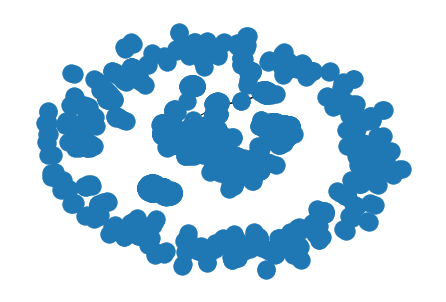

In [ ]:
c=0
for component in list(nx.connected_components(G)):
    c += 1
nx.draw(G)
print('number of nodes =',G.number_of_nodes(),', number of edges =', G.number_of_edges(),'. number of components =',c) 

In [ ]:
nx.write_gexf(G,'NEW net with 350 pages.gexf')
#nx.write_gexf(G,'net_50')

In [ ]:
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[913,
 381,
 379,
 213,
 40,
 35,
 32,
 29,
 27,
 21,
 20,
 20,
 20,
 18,
 18,
 13,
 13,
 13,
 12,
 12,
 12,
 11,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 7,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [ ]:
for e in S:
    print(e)

Graph with 913 nodes and 965 edges
Graph with 381 nodes and 608 edges
Graph with 213 nodes and 213 edges
Graph with 40 nodes and 39 edges
Graph with 379 nodes and 454 edges


In [ ]:
for i,e in enumerate(S):
    print('component',i)
    print(list(e.nodes.data()))

component 0
[(1546828871018123264, {'category': 'war'}), (1570405136119349249, {'category': 'war'}), (1570864232937279488, {'category': 'war'}), (1552945698466938880, {'category': 'war'}), (1557094110590377985, {'category': 'war'}), (1374117517682221061, {'category': 'war'}), (788068200680423424, {'category': 'war'}), (1497612959291424769, {'category': 'war'}), (1277689617794445313, {'category': 'war'}), (1240266389090435072, {'category': 'war'}), (1453968648477888516, {'category': 'war'}), (1510679240324399106, {'category': 'war'}), (1522911176581160966, {'category': 'war'}), (1549685438742286343, {'category': 'war'}), (1371135963469123590, {'category': 'war'}), (1502394564585439239, {'category': 'war'}), (13572112, {'category': 'war'}), (1497703105516953609, {'category': 'war'}), (1498766831582076942, {'category': 'war'}), (1513211016884240397, {'category': 'war'}), (1499843905944231948, {'category': 'war'}), (1429094883252387853, {'category': 'war'}), (1375586471764185105, {'categor

component 1
[(1492968163662868480, {'category': 'war'}), (1494762660302573569, {'category': 'war'}), (1570855321563799552, {'category': 'war'}), (1530174841978077185, {'category': 'war'}), (1501281725900595201, {'category': 'war'}), (1499825748307234821, {'category': 'war'}), (1570515126536617984, {'category': 'war'}), (1570868908277596162, {'category': 'war'}), (1570548248275988483, {'category': 'war'}), (1566923265767088128, {'category': 'war'}), (1564737974105001986, {'category': 'war'}), (1564681765142265857, {'category': 'war'}), (1473417708536541192, {'category': 'war'}), (1474878193823801357, {'category': 'war'}), (1455936665814507534, {'category': 'war'}), (1492331870570356747, {'category': 'war'}), (1433101070339817488, {'category': 'war'}), (1516178254679445518, {'category': 'war'}), (1496887783364956169, {'category': 'war'}), (1370042653631512586, {'category': 'war'}), (1473671970919268364, {'category': 'war'}), (1566881850513031172, {'category': 'war'}), (150523457774854145

component 2
[(1056011072463925248, {'category': 'war'}), (1006081814849576960, {'category': 'war'}), (1533986303716773888, {'category': 'war'}), (1533863834884112384, {'category': 'war'}), (1356089369820504065, {'category': 'war'}), (1544901465638146049, {'category': 'war'}), (1519255684575121408, {'category': 'war'}), (1484971654061166597, {'category': 'war'}), (1480932386703613958, {'category': 'war'}), (1505161363093704709, {'category': 'war'}), (1464903300642447368, {'category': 'war'}), (1533191197317120003, {'category': 'war'}), (1420505782563622916, {'category': 'war'}), (1361377617748844551, {'category': 'war'}), (1358871320293998594, {'category': 'war'}), (1089999267912171526, {'category': 'war'}), (1328792234276364295, {'category': 'war'}), (1508389974231687179, {'category': 'war'}), (1492183283580420108, {'category': 'war'}), (1475643351240163341, {'category': 'war'}), (1523569315819274241, {'category': 'war'}), (1466049585785282572, {'category': 'war'}), (147200760675983360

component 3
[(1529147570454511616, {'category': 'war'}), (1518768257833963521, {'category': 'war'}), (2477973888, {'category': 'war'}), (1533113942008020992, {'category': 'war'}), (1446883966670225412, {'category': 'war'}), (1498374754176323589, {'category': 'war'}), (1344267977777152000, {'category': 'war'}), (1169793310241755137, {'category': 'war'}), (1418896937437253640, {'category': 'war'}), (1242889136647921666, {'category': 'war'}), (1517302028883660809, {'category': 'war'}), (47941897, {'category': 'war'}), (1447248997253406723, {'category': 'war'}), (1162764654164226049, {'category': 'war'}), (1440388738253684745, {'category': 'war'}), (1460180978802970625, {'category': 'war'}), (1449095497701003280, {'category': 'war'}), (878783588350795778, {'category': 'war'}), (470919829, {'category': 'war'}), (1429901320799010816, {'category': 'war'}), (1174810652, {'category': 'war'}), (328626719, {'category': 'war'}), (25924647, {'category': 'war'}), (120100776, {'category': 'war'}), (1

In [ ]:
for component in list(nx.connected_components(G)):
    c += 1
    if len(component)<40:
        for node in component:
            G.remove_node(node)

number of nodes = 1926 , number of edges = 2279 . number of components = 5


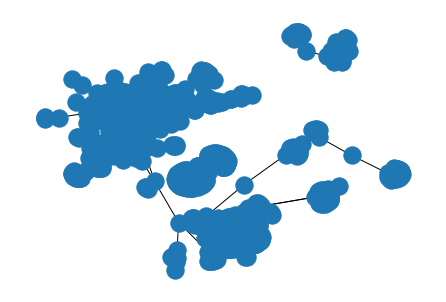

In [ ]:
c=0
for component in list(nx.connected_components(G)):
    c += 1
nx.draw(G)
print('number of nodes =',G.number_of_nodes(),', number of edges =', G.number_of_edges(),'. number of components =',c) 

In [ ]:
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
print(len(S))

5


In [ ]:
for e in S:
    print(e)

Graph with 913 nodes and 965 edges
Graph with 381 nodes and 608 edges
Graph with 213 nodes and 213 edges
Graph with 40 nodes and 39 edges
Graph with 379 nodes and 454 edges


In [ ]:
for i,e in enumerate(S):
    print('component',i)
    print(list(e.nodes.data()))

component 0
[(1546828871018123264, {'category': 'war'}), (1570405136119349249, {'category': 'war'}), (1570864232937279488, {'category': 'war'}), (1552945698466938880, {'category': 'war'}), (1557094110590377985, {'category': 'war'}), (1374117517682221061, {'category': 'war'}), (788068200680423424, {'category': 'war'}), (1497612959291424769, {'category': 'war'}), (1277689617794445313, {'category': 'war'}), (1240266389090435072, {'category': 'war'}), (1453968648477888516, {'category': 'war'}), (1510679240324399106, {'category': 'war'}), (1522911176581160966, {'category': 'war'}), (1549685438742286343, {'category': 'war'}), (1371135963469123590, {'category': 'war'}), (1502394564585439239, {'category': 'war'}), (13572112, {'category': 'war'}), (1497703105516953609, {'category': 'war'}), (1498766831582076942, {'category': 'war'}), (1513211016884240397, {'category': 'war'}), (1499843905944231948, {'category': 'war'}), (1429094883252387853, {'category': 'war'}), (1375586471764185105, {'categor

component 1
[(1492968163662868480, {'category': 'war'}), (1494762660302573569, {'category': 'war'}), (1570855321563799552, {'category': 'war'}), (1530174841978077185, {'category': 'war'}), (1501281725900595201, {'category': 'war'}), (1499825748307234821, {'category': 'war'}), (1570515126536617984, {'category': 'war'}), (1570868908277596162, {'category': 'war'}), (1570548248275988483, {'category': 'war'}), (1566923265767088128, {'category': 'war'}), (1564737974105001986, {'category': 'war'}), (1564681765142265857, {'category': 'war'}), (1473417708536541192, {'category': 'war'}), (1474878193823801357, {'category': 'war'}), (1455936665814507534, {'category': 'war'}), (1492331870570356747, {'category': 'war'}), (1433101070339817488, {'category': 'war'}), (1516178254679445518, {'category': 'war'}), (1496887783364956169, {'category': 'war'}), (1370042653631512586, {'category': 'war'}), (1473671970919268364, {'category': 'war'}), (1566881850513031172, {'category': 'war'}), (150523457774854145

component 2
[(1056011072463925248, {'category': 'war'}), (1006081814849576960, {'category': 'war'}), (1533986303716773888, {'category': 'war'}), (1533863834884112384, {'category': 'war'}), (1356089369820504065, {'category': 'war'}), (1544901465638146049, {'category': 'war'}), (1519255684575121408, {'category': 'war'}), (1484971654061166597, {'category': 'war'}), (1480932386703613958, {'category': 'war'}), (1505161363093704709, {'category': 'war'}), (1464903300642447368, {'category': 'war'}), (1533191197317120003, {'category': 'war'}), (1420505782563622916, {'category': 'war'}), (1361377617748844551, {'category': 'war'}), (1358871320293998594, {'category': 'war'}), (1089999267912171526, {'category': 'war'}), (1328792234276364295, {'category': 'war'}), (1508389974231687179, {'category': 'war'}), (1492183283580420108, {'category': 'war'}), (1475643351240163341, {'category': 'war'}), (1523569315819274241, {'category': 'war'}), (1466049585785282572, {'category': 'war'}), (147200760675983360

component 3
[(1529147570454511616, {'category': 'war'}), (1518768257833963521, {'category': 'war'}), (2477973888, {'category': 'war'}), (1533113942008020992, {'category': 'war'}), (1446883966670225412, {'category': 'war'}), (1498374754176323589, {'category': 'war'}), (1344267977777152000, {'category': 'war'}), (1169793310241755137, {'category': 'war'}), (1418896937437253640, {'category': 'war'}), (1242889136647921666, {'category': 'war'}), (1517302028883660809, {'category': 'war'}), (47941897, {'category': 'war'}), (1447248997253406723, {'category': 'war'}), (1162764654164226049, {'category': 'war'}), (1440388738253684745, {'category': 'war'}), (1460180978802970625, {'category': 'war'}), (1449095497701003280, {'category': 'war'}), (878783588350795778, {'category': 'war'}), (470919829, {'category': 'war'}), (1429901320799010816, {'category': 'war'}), (1174810652, {'category': 'war'}), (328626719, {'category': 'war'}), (25924647, {'category': 'war'}), (120100776, {'category': 'war'}), (1